# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# Loading the dataset
dataset = pd.read_csv('../Simple Linear Regression/melon.csv')
# Displaying the first 5 rows of the dataset
dataset.head(5)

,Weight,Price
0,1,50
1,2,100
2,3,140
3,4,180
4,5,220


In [3]:
# Information about the dataset, including data types and null values
dataset.info()
# Shape of the dataset (number of rows and columns)
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  10 non-null     int64
 1   Price   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


(10, 2)

In [4]:
# Checking for duplicated rows in the dataset
dataset.duplicated().sum()

0

In [5]:
# Descriptive statistics of the dataset with styled background gradient
dataset.describe().style.background_gradient(cmap = "Purples")

,Weight,Price
count,10.000000,10.000000
mean,5.500000,235.000000
std,3.027650,117.968922
min,1.000000,50.000000
25%,3.250000,150.000000
50%,5.500000,235.000000
75%,7.750000,330.000000
max,10.000000,390.000000


## Extracting features (X) and target variable (y) from the dataset

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
y = y.reshape(len(y),1)

In [10]:
print(y)

[[ 50]
 [100]
 [140]
 [180]
 [220]
 [250]
 [300]
 [340]
 [380]
 [390]]


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [13]:
print(y)

[[-1.65303809]
 [-1.20627104]
 [-0.8488574 ]
 [-0.49144376]
 [-0.13403012]
 [ 0.13403012]
 [ 0.58079717]
 [ 0.93821081]
 [ 1.29562445]
 [ 1.38497786]]


## Training the SVR model on the whole dataset

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=.1)
regressor.fit(X, y)

# RBF kernel for handling non-linear relationships.
# C=100 which likely prioritizes a larger margin (more complex model, needs evaluation for overfitting).
# gamma=0.1 which suggests a moderate influence from nearby training points.
# epsilon=0.1 which allows for some margin of error in predictions.

# kernel (default='rbf'): This parameter defines the kernel function used by the SVR algorithm. Kernel functions are crucial for handling non-linear relationships in the data.
# C (default=1.0): This parameter controls the trade-off between maximizing the margin and minimizing the training error.
# gamma (default='scale'): This parameter is specific to some kernel functions like RBF (used in your code). It controls the influence of each training sample on the overall model.
# epsilon (default=0.1): This parameter defines the epsilon-tube within which no penalty is incurred for prediction errors. Essentially, it allows for a certain margin of error around the hyperplane (decision boundary) in SVR.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

## Predicting a new result

In [15]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[282.72087898]])

## Visualising the SVR results

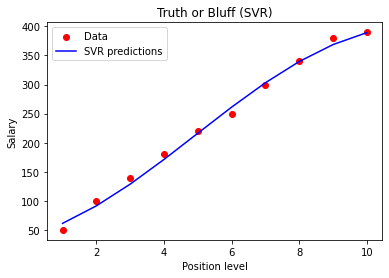

In [16]:
# Plot actual data and SVR predictions
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', label='Data')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue', label='SVR predictions')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

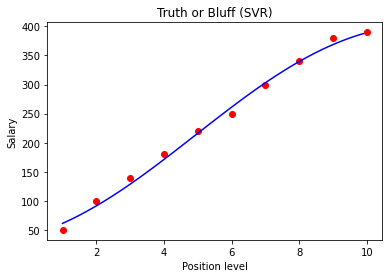

In [17]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', label='Data')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue', label='SVR predictions')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()